In [6]:
import numpy as np
import pandas as pd

In [7]:
# random seed

np.random.seed(42)

set1no = 900
set2no = 100

In [8]:
## dataframe with imbalanced data set
df1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=set1no),
    'feature_2': np.random.normal(loc=0, scale=1, size=set1no),
    'target': [0] * set1no
})

df2 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=set2no),
    'feature_2': np.random.normal(loc=2, scale=1, size=set2no),
    'target': [1] * set2no
})

In [9]:
df1.head()

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [10]:
df2.head()

,feature_1,feature_2,target
0,3.901191,2.696954,1
1,1.939339,1.666181,1
2,1.291593,3.173125,1
3,0.486286,2.369642,1
4,0.196860,1.892698,1


In [11]:
df=pd.concat([df1,df2]).reset_index(drop=True)

In [12]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [13]:
df ["target"].unique()

array([0, 1])

In [14]:
df["target"].value_counts()     #cokta dengeli bir dagilim degil ml model icin. sonuc kotu olacaktir. 

target
0    900
1    100
Name: count, dtype: int64

In [15]:
# upsampling -->  minority  --> birleri bi nevi arttirmak. azinlik olanlari attirmak 1'leri 900'e cikarmak gibi

In [16]:
# downsampling --> downsample majorty  --> yani cogunlugu azaltmak  yani 0'lari 100'e indirmek  

In [17]:
# upsmapling

In [18]:
df_minority = df[df["target"] == 1]      # ilk once datasi az olanlari gorelim ve tanimlayalim.

In [19]:
df_minority

,feature_1,feature_2,target
900,3.901191,2.696954,1
901,1.939339,1.666181,1
902,1.291593,3.173125,1
903,0.486286,2.369642,1
904,0.196860,1.892698,1
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [20]:
df_majority = df[df["target"] == 0]

In [21]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [22]:
# upsample icin ve ya downsample icin kutuphane kullanacagiz hazir olarak. ismi ----  sklearn ----- 

In [23]:
from sklearn.utils import resample

In [25]:
df_minority_unsampled = resample (df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [28]:
df_minority_unsampled.shape

(900, 3)

In [33]:
df_minority_unsampled

,feature_1,feature_2,target
951,3.775311,3.261922,1
992,1.563614,3.188913,1
914,1.731469,0.198942,1
971,1.785079,-0.940389,1
960,1.865691,1.945106,1
...,...,...,...
952,0.806363,1.094268,1
965,0.337508,2.089581,1
976,1.437832,3.124113,1
942,1.451275,2.269127,1


In [ ]:
## simdi yaptigimiz islem tam olarak soyle. minorty'yi majority'e esitledik yukarida ve asagida ise elde ettigimiz yeni minort yi 


In [ ]:
## majority ile birlerstirdik concat ile. tekrardan target value ye baktigimizda 0 ve 1 lerin 900 olarak esit olduklarini gormus olduk.

In [31]:
df_upsampled = pd.concat([df_majority, df_minority_unsampled])

In [32]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [34]:
## down sampling -> generally less preferable 

In [35]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [36]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [37]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [38]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=True, 
         n_samples=len(df_minority),
         random_state=42
        )

In [39]:
df_majority_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [40]:
df_majority_downsampled['target'].value_counts()

target
0    100
Name: count, dtype: int64

In [41]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [43]:
df_downsampled

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [44]:
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [45]:
#SMOTE

In [46]:

df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [50]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


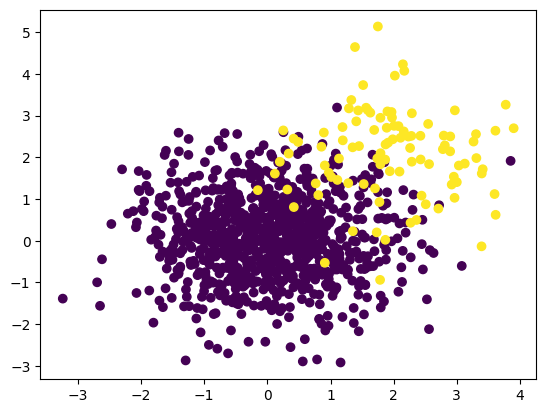

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'],df['feature_2'],c=df['target'])

In [52]:
!pip install imblearn

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:

oversample = SMOTE()


In [55]:
X,y=oversample.fit_resample(df[['feature_1','feature_2']],df['target'])

In [56]:
X

,feature_1,feature_2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,2.701868,1.826691
1796,3.545917,0.664057
1797,3.358114,1.774219
1798,2.486916,1.852372


In [57]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [58]:
df1=pd.DataFrame(X,columns=['feature_1','feature_2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

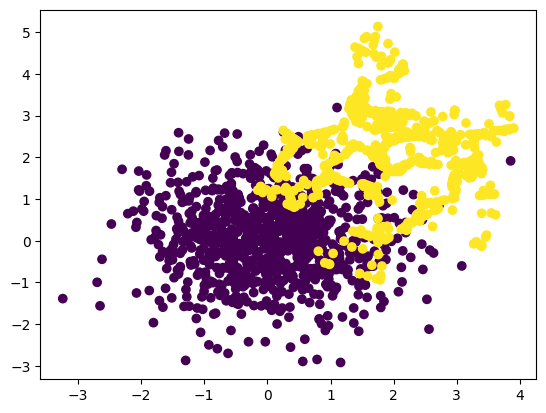

In [59]:
plt.scatter(oversample_df['feature_1'],oversample_df['feature_2'],c=oversample_df['target'])

In [60]:

oversample_df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,2.701868,1.826691,1
1796,3.545917,0.664057,1
1797,3.358114,1.774219,1
1798,2.486916,1.852372,1


In [61]:

oversample_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64